In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Question 1

In [2]:
filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename, 
                     index_col = [2,0], 
                     header = [0],
                     sheet_name = "EFW Panel Data 2022 Report")
rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}
data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
hw_data = pd.read_excel("EFWAndRGDP.xls")
type(hw_data)

pandas.core.frame.DataFrame

In [4]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

In [5]:
type(oecd_countries)

list

In [6]:
oecd_datastuff = hw_data[hw_data["Countries"].isin(oecd_countries)]

In [7]:
reg_vars = list(oecd_datastuff.keys())
del reg_vars[:7]
reg_vars

['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [8]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[:-1]
reg_data = oecd_datastuff[reg_vars]
reg_data.corr().round(2)

,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Size of Government,1.00,-0.24,0.05,0.01,0.16,-0.14
Legal System and Property Rights,-0.24,1.00,0.43,0.42,0.60,0.71
Sound Money,0.05,0.43,1.00,0.65,0.59,0.51
Freedom to Trade Internationally,0.01,0.42,0.65,1.00,0.49,0.39
Regulation,0.16,0.60,0.59,0.49,1.00,0.58
RGDP Per Capita,-0.14,0.71,0.51,0.39,0.58,1.00


In [9]:
y = reg_data.dropna()[y_var]
X = reg_data.dropna()[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [10]:
predictor = results.predict(reg_data)
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/1260771806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita,RGDP Per Capita Predictor
135,6.863768,7.775615,9.581113,5.882101,6.335298,19166.0000,-7.538674e+08
136,6.255684,8.034445,8.346907,5.692162,6.761980,20993.0000,-8.257364e+08
137,6.339449,8.037057,9.085686,5.841104,7.389934,22972.0000,-9.035822e+08
138,6.259326,8.540345,9.089736,6.985368,7.469774,24927.0000,-9.804844e+08
139,6.708215,8.398730,9.018318,7.661409,7.750886,27373.0000,-1.076705e+09
...,...,...,...,...,...,...,...
4288,7.252009,7.793107,9.814703,7.889129,8.952382,53015.0000,-2.085394e+09
4289,7.354358,7.802657,9.772320,7.921225,9.031901,54007.7698,-2.124447e+09
4290,7.409095,7.646530,9.772494,7.783384,8.784245,55334.7394,-2.176648e+09
4291,7.320058,7.644319,9.747903,7.829949,8.682216,NaN,NaN


In [11]:
years_diff = 5

In [12]:
reg_data["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].shift(years_diff)
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/615619087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] = reg_data[
C:\Users\Owner\AppData\Local\Temp/ipykernel_484/615619087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     467.5
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          5.68e-256
Time:                        14:07:25   Log-Likelihood:                -8146.8
No. Observations:                 797   AIC:                         1.631e+04
Df Residuals:                     790   BIC:                         1.634e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 486.2763    265.312      1.833      0.067     -34.523    1007.076
Legal System and Property Rights  2474.8849    315.488      7.845      0.000    1855.591    3094.179
Sound Money                       2532.4784    268.751      9.423      0.000    2004.927    3060.029
Freedom to Trade Internationally  1763.5808    325.297      5.421      0.000    1125.031    2402.130
Regulation                        1261.7169    365.652      3.451      0.001     543.953    1979.481
RGDP Per Capita Lag                  0.6035      0.022     27.249      0.000       0.560       0.647
Constant                         -5.361e+04   2784.923    -19.250      0.000   -5.91e+04   -4.81e+04
==============================================================================
Omnibus:                       85.917   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.283
Skew:                          -0.014   Prob(JB):                    9.21e-140
Kurtosis:                       7.391   Cond. No.                     3.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 2

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/961559403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot:ylabel='Frequency'>

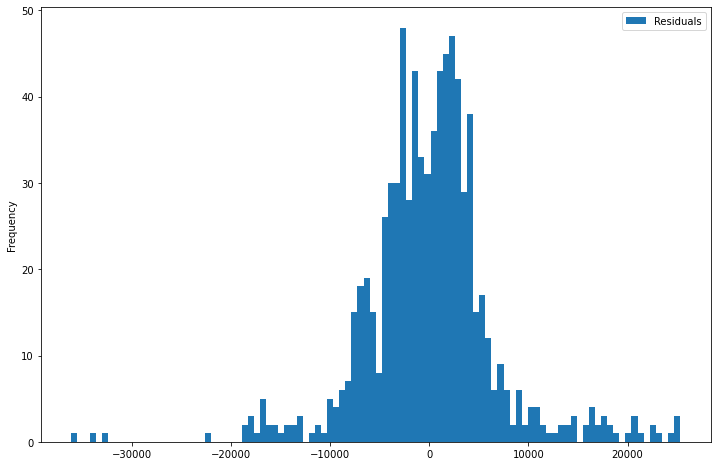

In [14]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

The shape looks almost like a normal distribution of residuals, however, the one I have made compared to the first regression looks more normal in curvature but is shifted leftward than the one I made. The distinction between the two is that the class example is very skewed to the left while the one I made is more central. 

# Problem 3

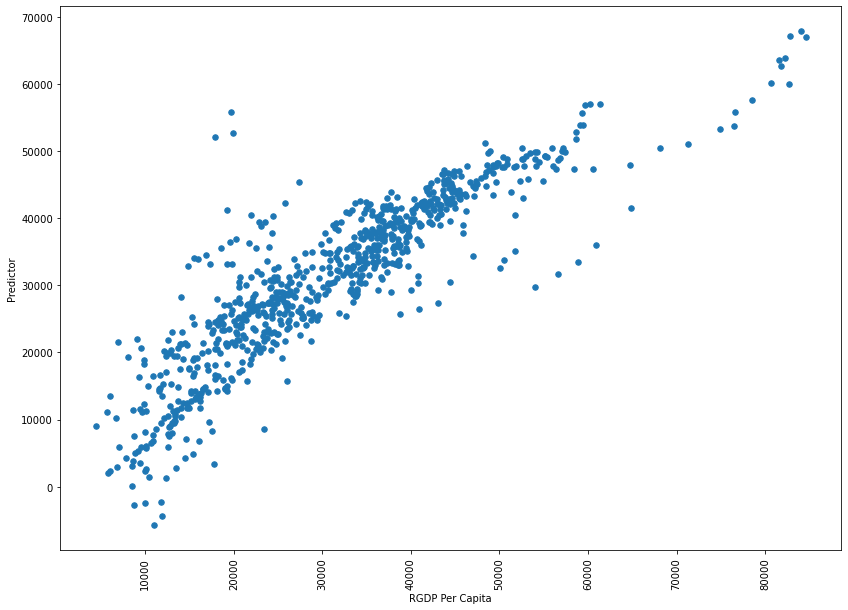

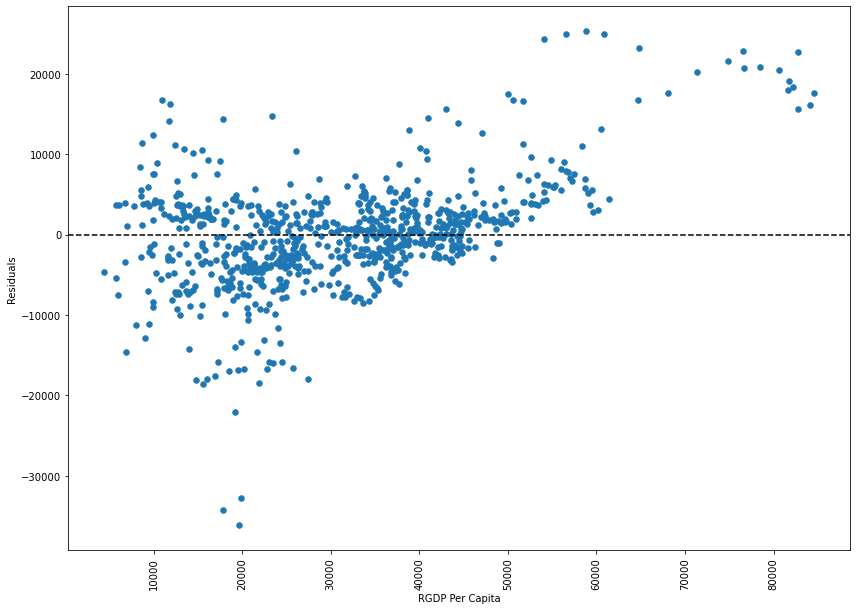

In [15]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

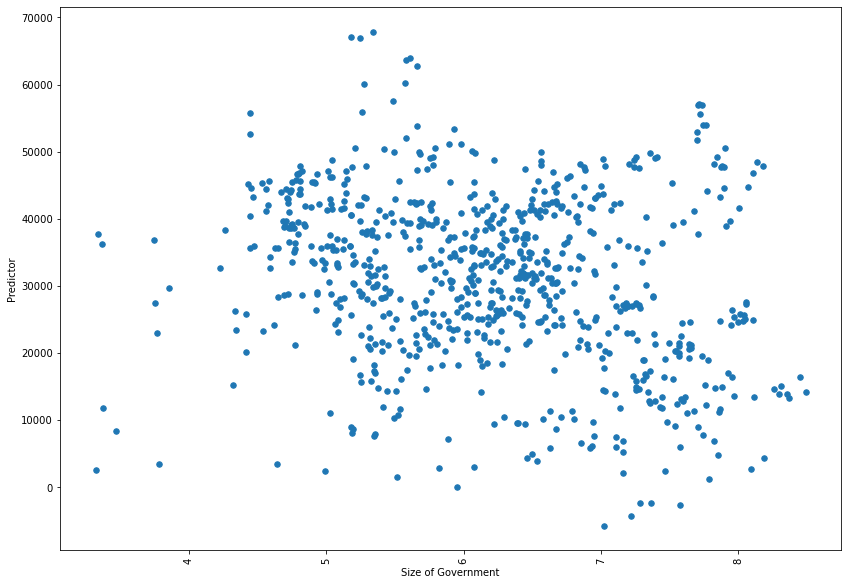

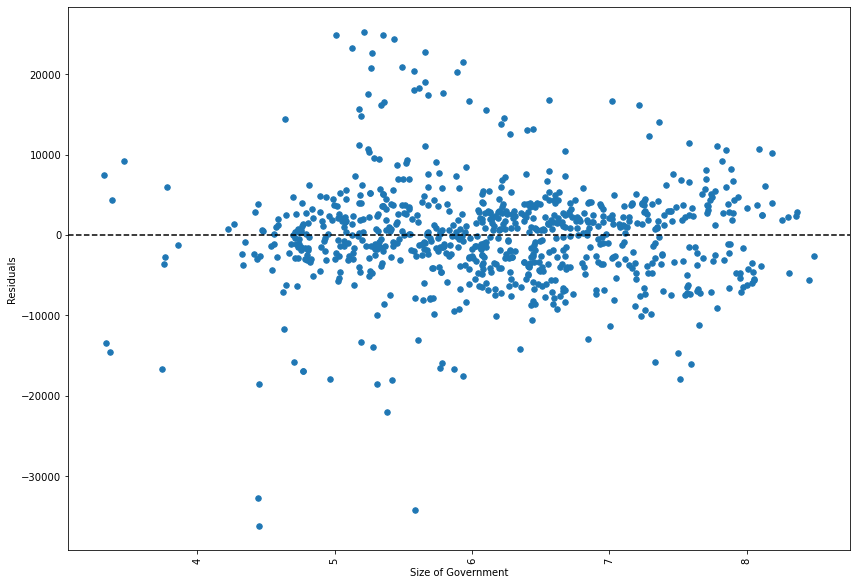

In [16]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Size of Government",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Size of Government",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

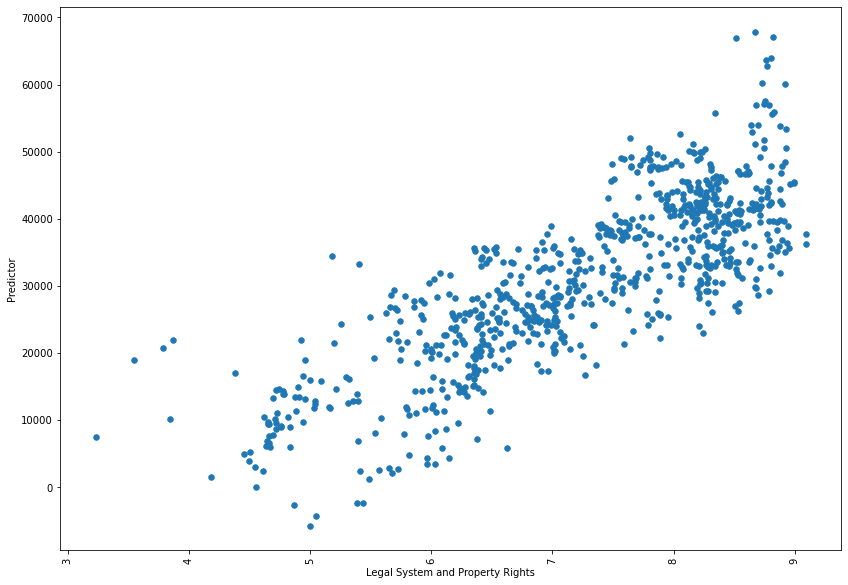

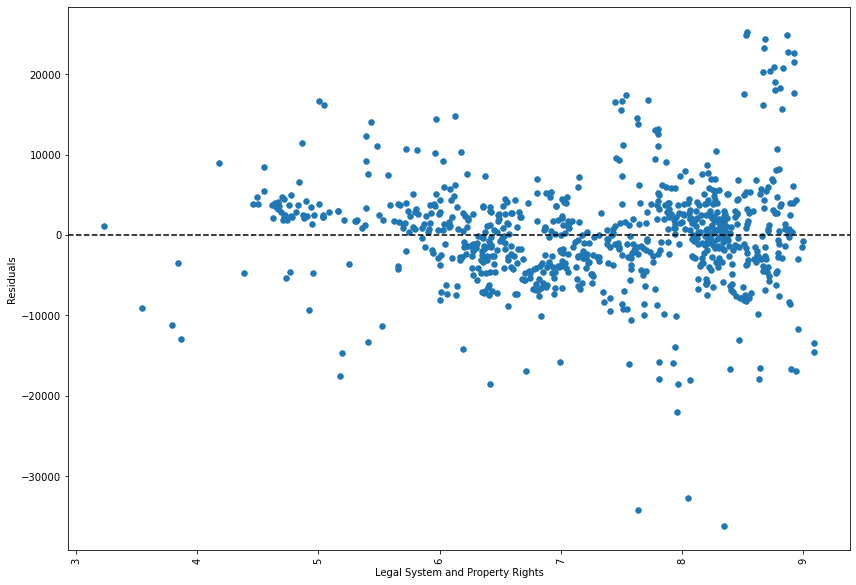

In [17]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Legal System and Property Rights",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Legal System and Property Rights",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

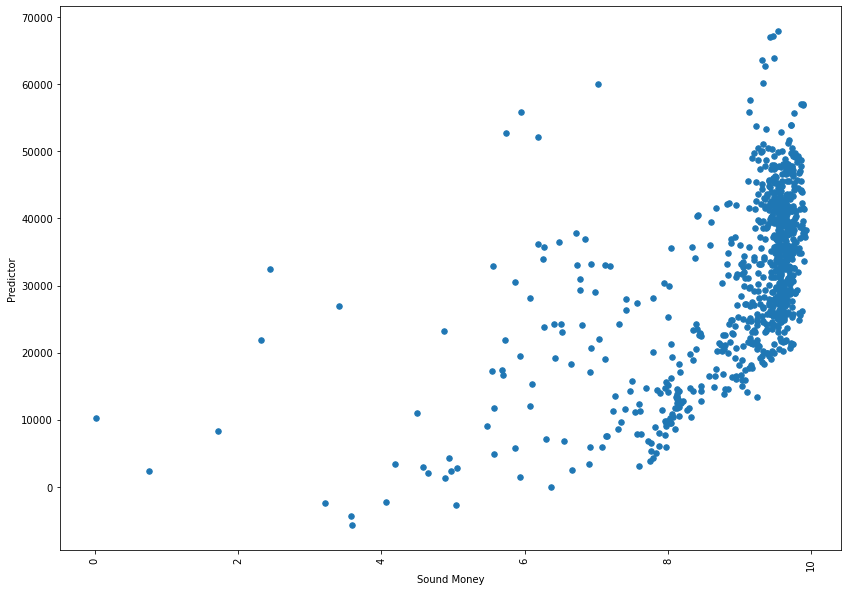

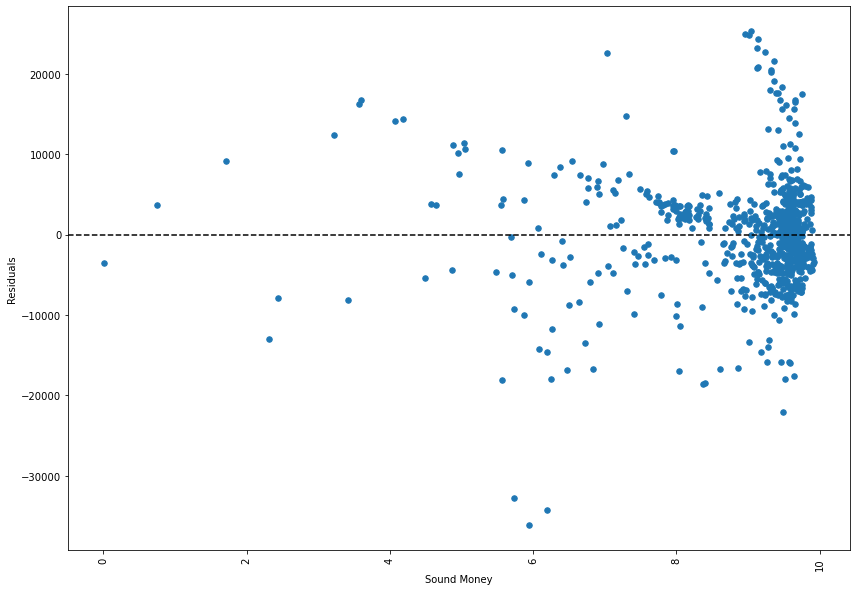

In [18]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Sound Money",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Sound Money",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

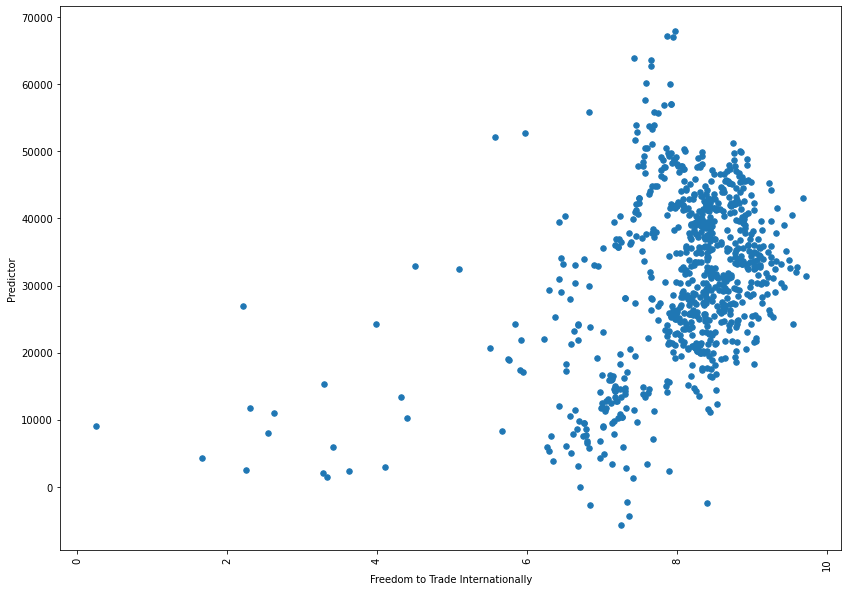

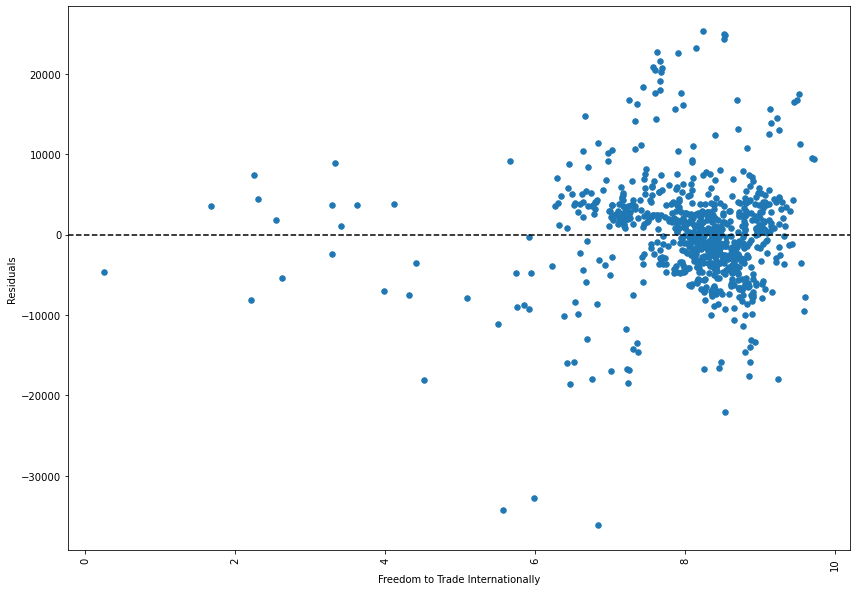

In [19]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

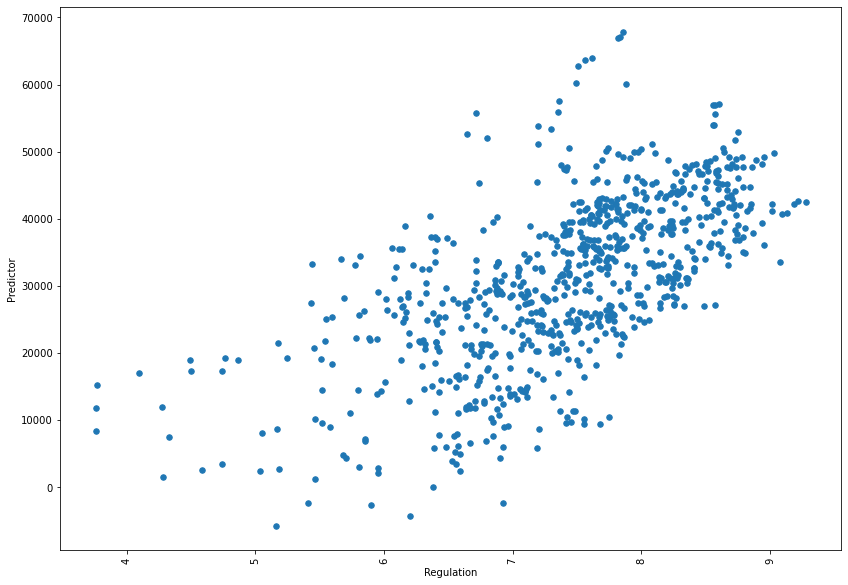

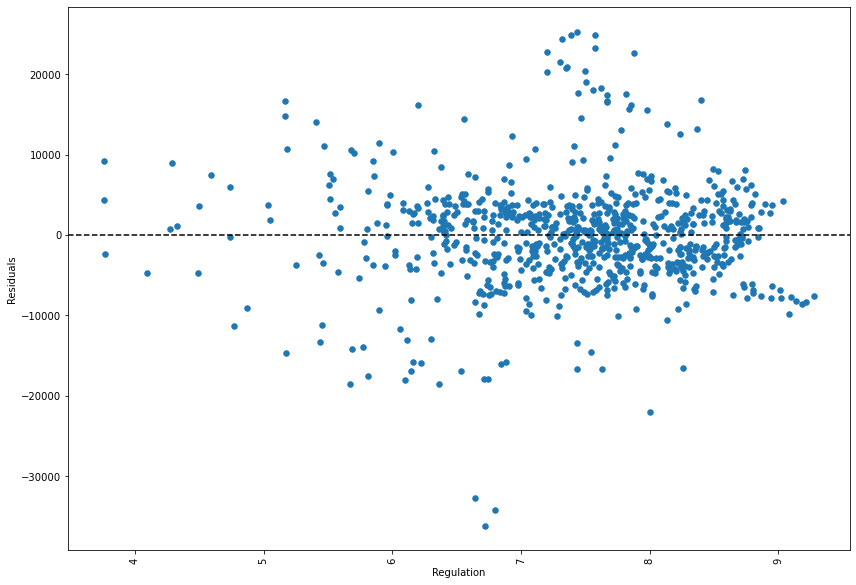

In [20]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Regulation",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Regulation",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

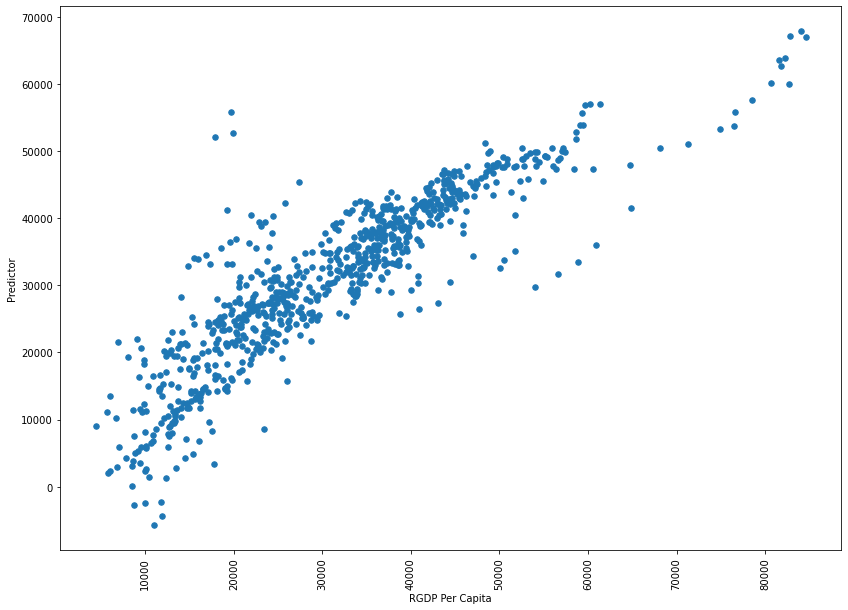

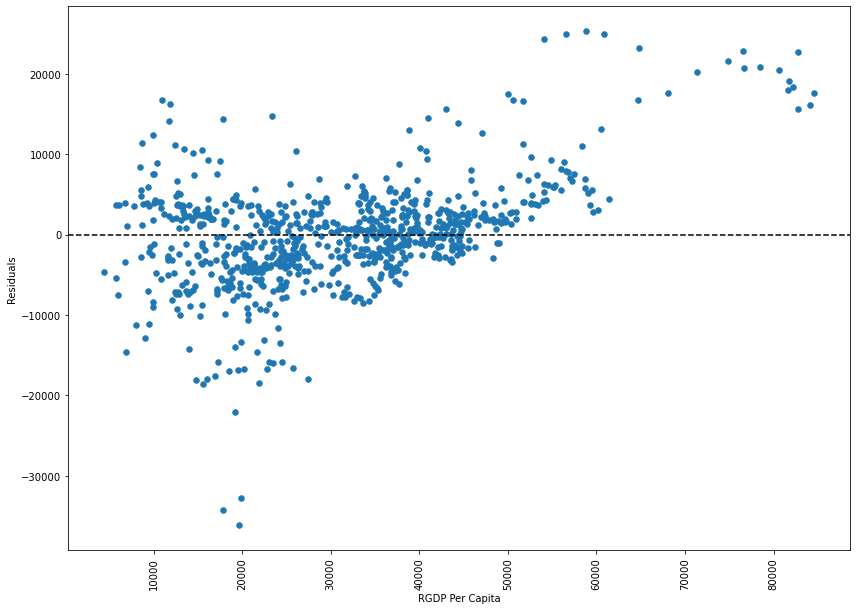

In [21]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "RGDP Per Capita",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "RGDP Per Capita",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

Yes, residual plots are a great way to determine whether a linear model is appropriate in modeling the various freedom indexes. If we see random scatter then we can conclude that a linear model can explain the relationship between our predictor and x variable (fredom indexes). Most of these residual plots do not have random scatter, it can be argued that Regulation and Size of Government has random to some extent. Overall, the best way to see the relationship between the freedom indexes and Y predictor is through a multiple regression model because there is clear confounding shown (due to not random scatter in residual plots). It is important to notice the biases so we can accurately explain the relationship among these variables because the x variables compete with each other. 

# Question 4

In [22]:
reg_vars = list(oecd_datastuff.keys())
del reg_vars1[:5]
reg_vars

['Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [23]:
y_var = [reg_vars1[0]]
x_vars = reg_vars1[0]
reg_data1 = oecd_datastuff[reg_vars1]
reg_data1.corr().round(2)

,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Summary,1.00,0.26,0.67,0.83,0.78,0.84,0.62
Size of Government,0.26,1.00,-0.24,0.05,0.01,0.16,-0.14
Legal System and Property Rights,0.67,-0.24,1.00,0.43,0.42,0.60,0.71
Sound Money,0.83,0.05,0.43,1.00,0.65,0.59,0.51
Freedom to Trade Internationally,0.78,0.01,0.42,0.65,1.00,0.49,0.39
Regulation,0.84,0.16,0.60,0.59,0.49,1.00,0.58
RGDP Per Capita,0.62,-0.14,0.71,0.51,0.39,0.58,1.00


In [24]:
countries = reg_vars1.groupby("RGDP Per Capita").mean().index
plot_data = reg_vars1[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()

# Question 5

In [29]:
oecd_datastuff = hw_data[hw_data["Countries"].isin(oecd_countries)]

In [30]:
reg_vars = list(oecd_datastuff.keys())
del reg_vars[:7]

In [31]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[:-1]
reg_data = oecd_datastuff[reg_vars]
reg_data.corr().round(2)

,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Size of Government,1.00,-0.24,0.05,0.01,0.16,-0.14
Legal System and Property Rights,-0.24,1.00,0.43,0.42,0.60,0.71
Sound Money,0.05,0.43,1.00,0.65,0.59,0.51
Freedom to Trade Internationally,0.01,0.42,0.65,1.00,0.49,0.39
Regulation,0.16,0.60,0.59,0.49,1.00,0.58
RGDP Per Capita,-0.14,0.71,0.51,0.39,0.58,1.00


In [32]:
y = reg_data.dropna()[y_var]
X = reg_data.dropna()[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [33]:
predictor = results.predict(reg_data)
reg_data[y_var[0] + " Predictor"] = predictor

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/4209520168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


In [34]:
years_diff = 2

In [35]:
reg_data["RGDP Per Capita Lag"] = reg_data[
    "RGDP Per Capita"].shift(years_diff)
x_vars.append("RGDP Per Capita Lag")
r_data = reg_data.dropna()
y = r_data.dropna(axis = 0, how = "any")[y_var]
X = r_data.dropna(axis = 0, how = "any")[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_data["Predictor"] = results.predict()

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/615619087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] = reg_data[
C:\Users\Owner\AppData\Local\Temp/ipykernel_484/615619087.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Predictor"] = results.predict()


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     4204.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:12:17   Log-Likelihood:                -7502.7
No. Observations:                 813   AIC:                         1.502e+04
Df Residuals:                     806   BIC:                         1.505e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 120.7211     97.612      1.237      0.217     -70.883     312.326
Legal System and Property Rights  1418.4265    117.779     12.043      0.000    1187.238    1649.615
Sound Money                         56.0183     92.916      0.603      0.547    -126.368     238.404
Freedom to Trade Internationally   122.5218    119.673      1.024      0.306    -112.385     357.429
Regulation                        -555.1422    136.223     -4.075      0.000    -822.536    -287.748
RGDP Per Capita Lag                  0.9211      0.009    100.084      0.000       0.903       0.939
Constant                         -4206.6291   1044.796     -4.026      0.000   -6257.472   -2155.786
==============================================================================
Omnibus:                      382.780   Durbin-Watson:                   0.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4878.440
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                      14.453   Cond. No.                     3.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Owner\AppData\Local\Temp/ipykernel_484/961559403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_data["Residuals"] = results.resid


<AxesSubplot:ylabel='Frequency'>

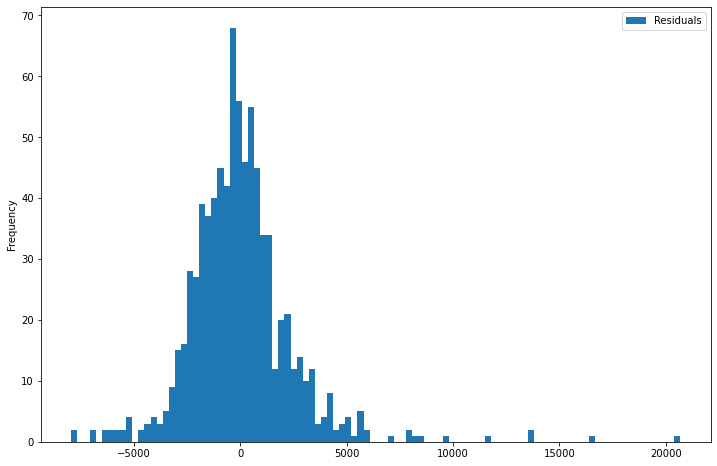

In [37]:
r_data["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_data[["Residuals"]].plot.hist(bins = 100, ax = ax)

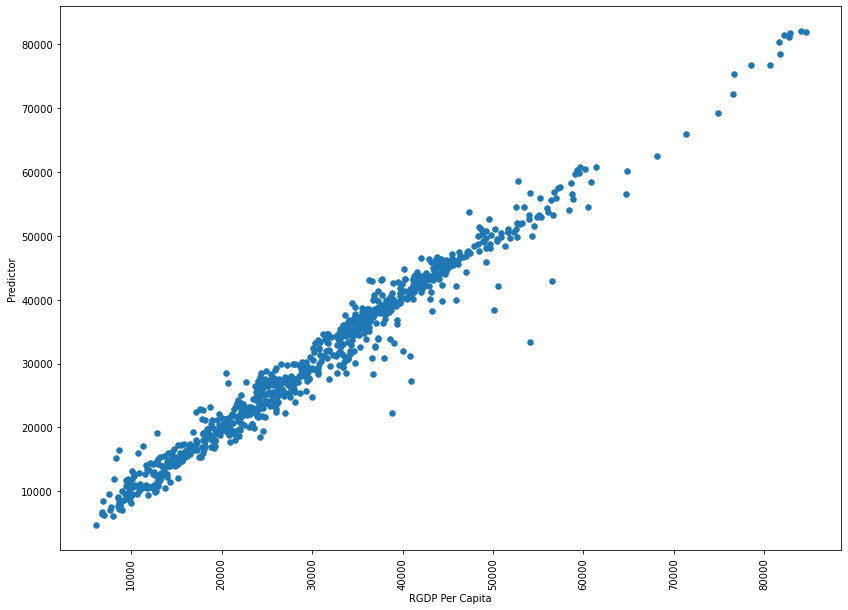

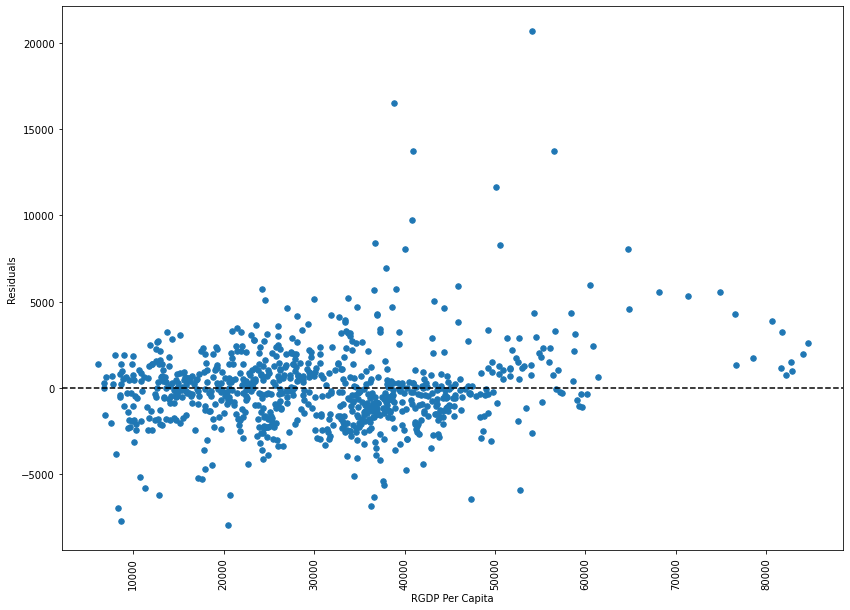

In [38]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = y_var[0],
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

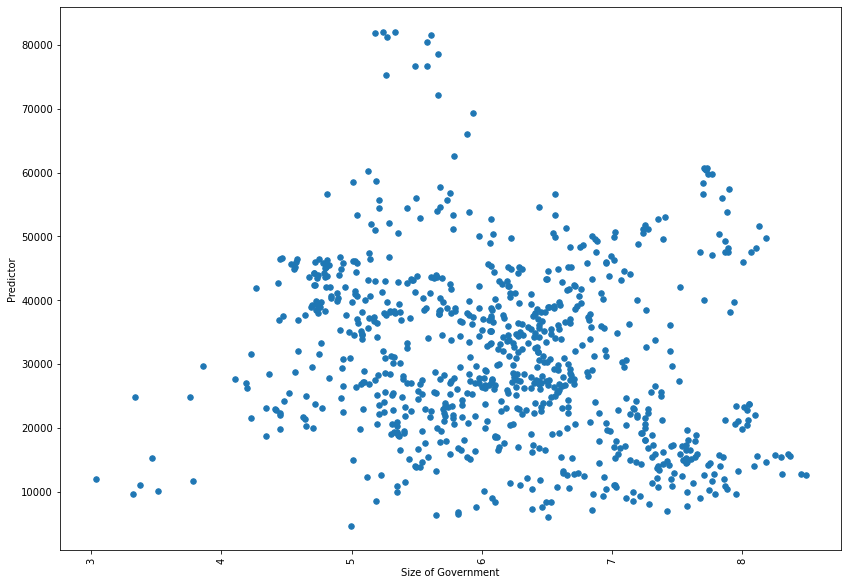

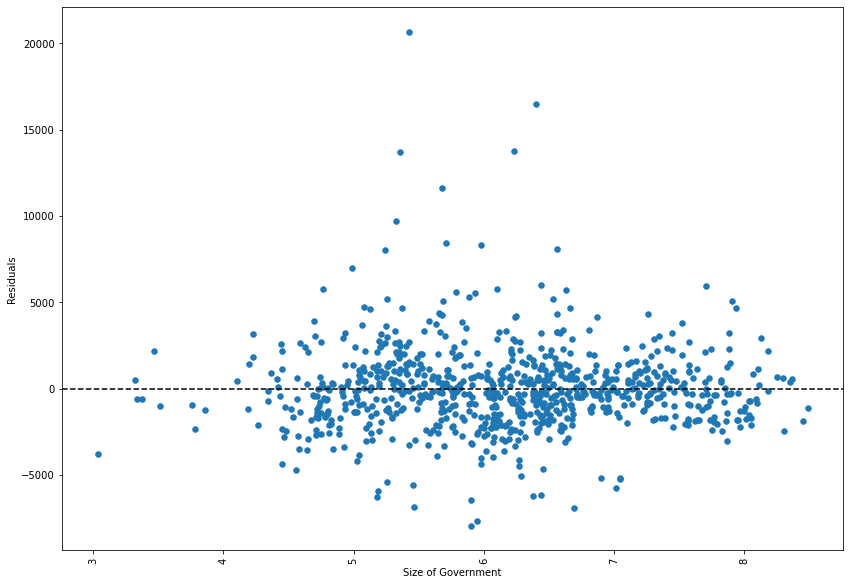

In [39]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Size of Government",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Size of Government",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

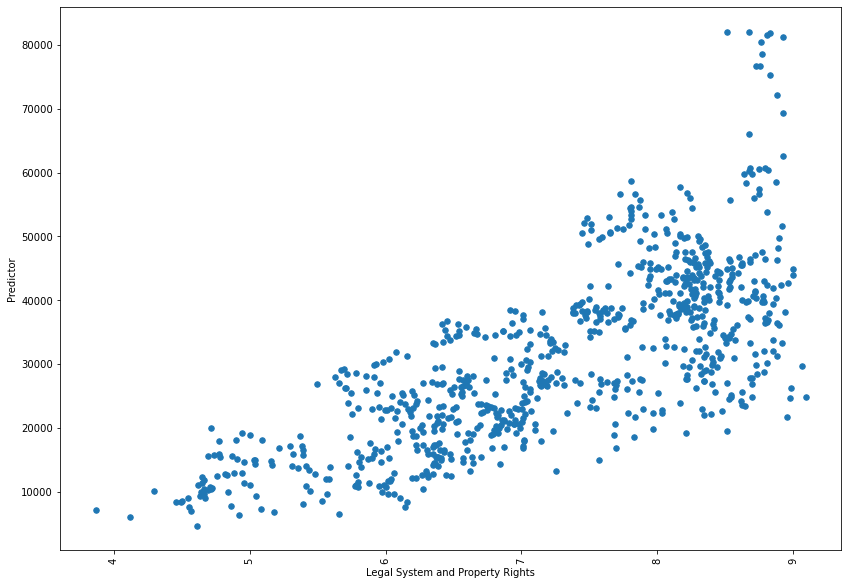

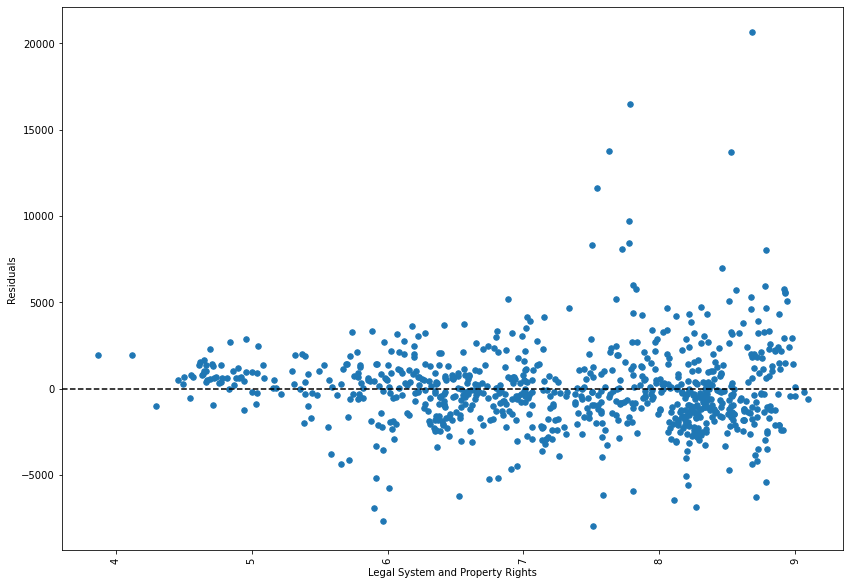

In [40]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Legal System and Property Rights",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Legal System and Property Rights",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

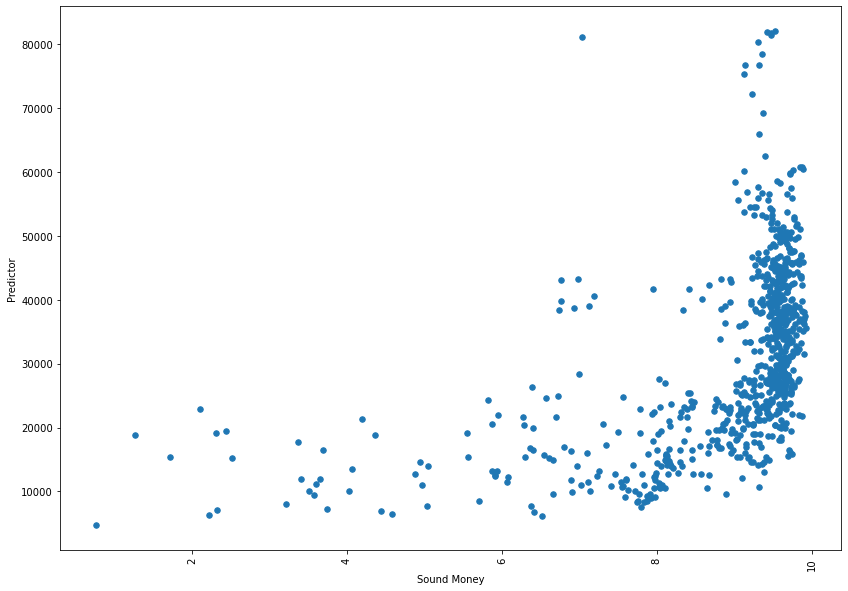

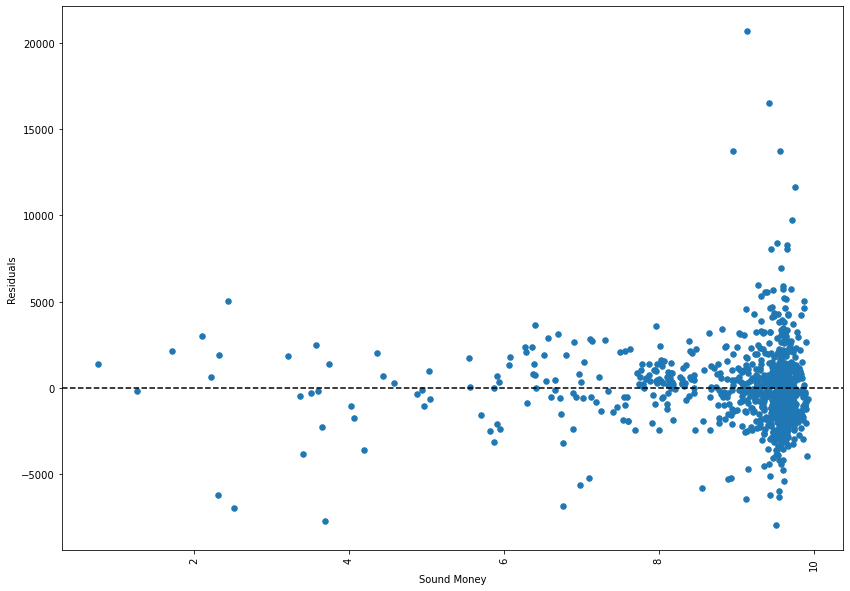

In [41]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Sound Money",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Sound Money",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

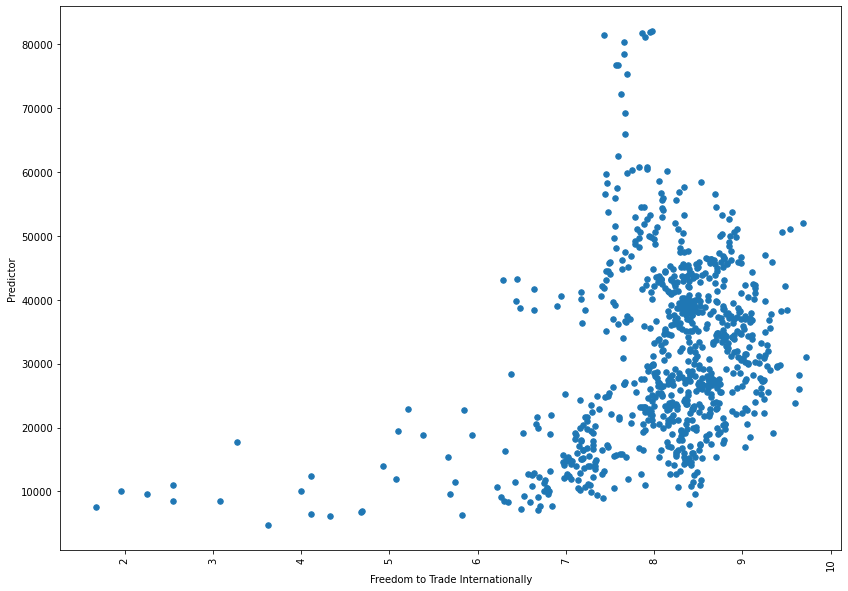

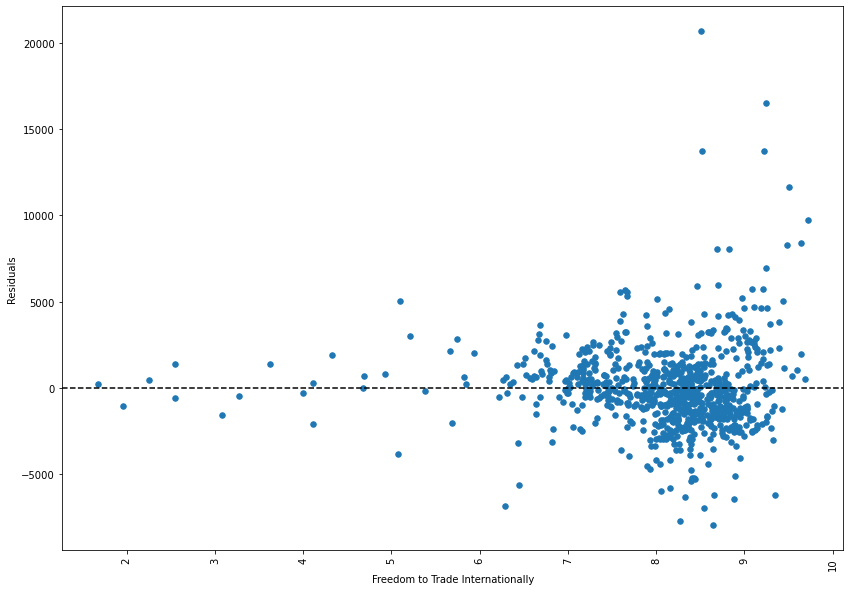

In [42]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Freedom to Trade Internationally",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

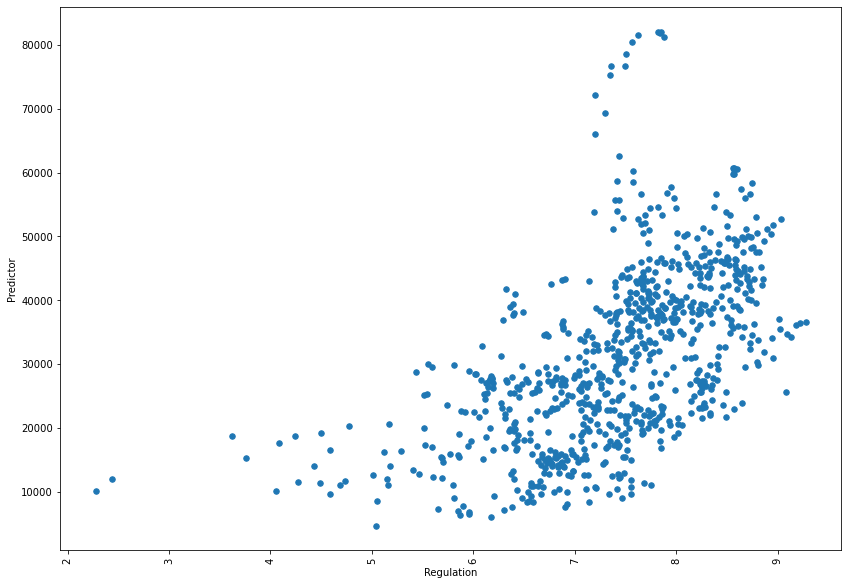

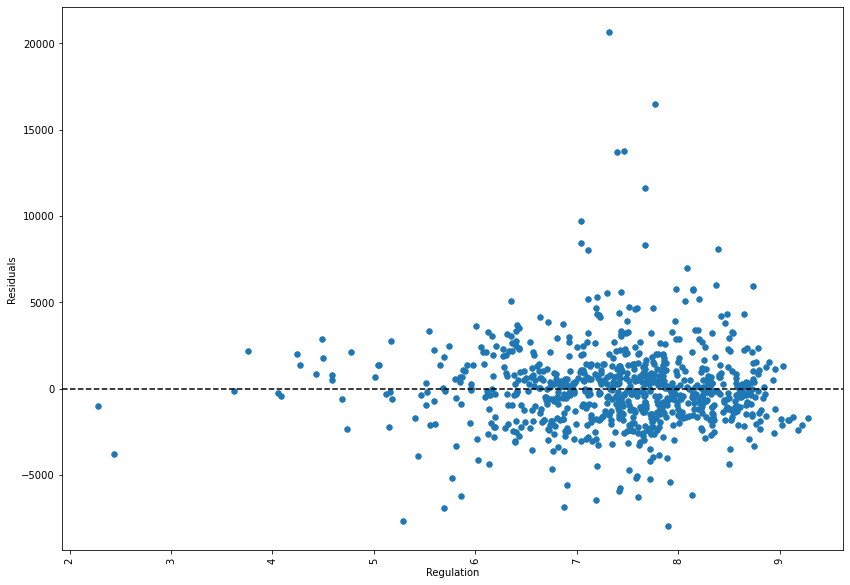

In [43]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Regulation",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "Regulation",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

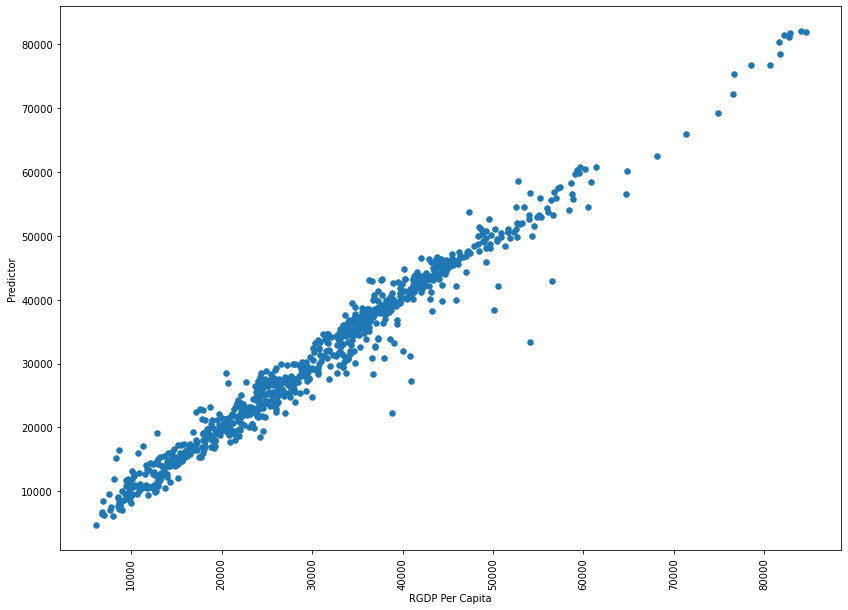

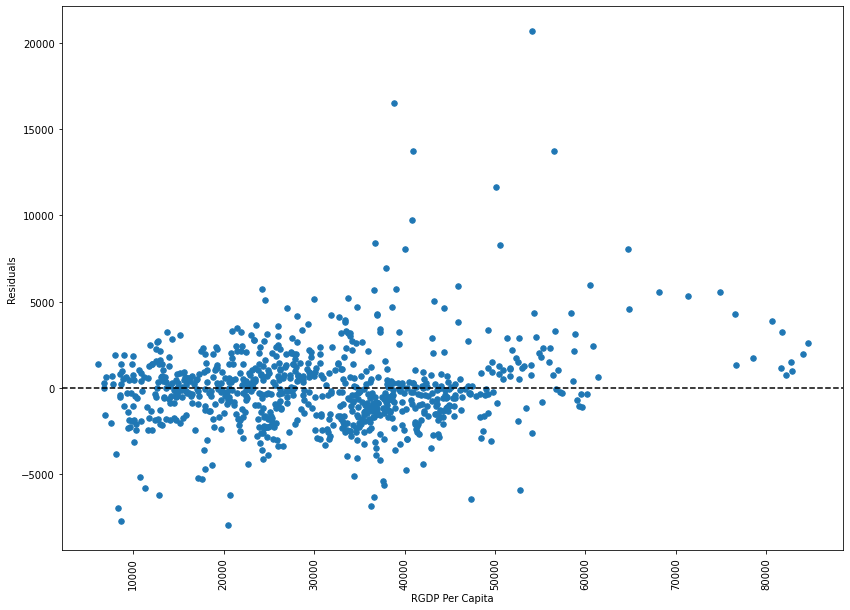

In [44]:
fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "RGDP Per Capita",
                 y = "Predictor", 
                  s = 30, ax = ax)
plt.xticks(rotation=90)
plt.show()
plt.close()

fig, ax = plt.subplots(figsize = (14,10))
r_data.plot.scatter(x = "RGDP Per Capita",
                 y = "Residuals", 
                  s = 30, ax = ax)
ax.axhline(0, ls = "--", color = "k")
plt.xticks(rotation=90)
plt.show()
plt.close()

In [46]:
reg_vars = list(oecd_datastuff.keys())
del reg_vars[:5]
reg_vars

['Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [47]:
y_var = [reg_vars[0]]
x_vars = reg_vars[0]
reg_data = oecd_datastuff[reg_vars]
reg_data.corr().round(2)

,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Summary,1.00,0.26,0.67,0.83,0.78,0.84,0.62
Size of Government,0.26,1.00,-0.24,0.05,0.01,0.16,-0.14
Legal System and Property Rights,0.67,-0.24,1.00,0.43,0.42,0.60,0.71
Sound Money,0.83,0.05,0.43,1.00,0.65,0.59,0.51
Freedom to Trade Internationally,0.78,0.01,0.42,0.65,1.00,0.49,0.39
Regulation,0.84,0.16,0.60,0.59,0.49,1.00,0.58
RGDP Per Capita,0.62,-0.14,0.71,0.51,0.39,0.58,1.00


In [48]:
countries = reg_vars.groupby("RGDP Per Capita").mean().index
plot_data = reg_vars[y_var + ["Predictor"]]
for key in plot_data:
    plot_data[key] = plot_data[key] + 1

plot_data

AttributeError: 'list' object has no attribute 'groupby'

In [49]:
for country in countries:
    fig, ax = plt.subplots(figsize = (12,8))

    plot_data[y_var + ["Predictor"]].loc[country].cumprod().plot.line(ax = ax, legend = False)
    
    ax.set_title(country)
    plt.plot()

NameError: name 'countries' is not defined